#Data Importing

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

path='/content/drive/My Drive/data'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [ ]:
train_xlsx_path = '/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/Data Latih BDC.xlsx'
test_xlsx_path = '/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/Data Uji BDC.xlsx'
train_image_path = '/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/File Gambar Data Latih/'
test_image_path = '/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/File Gambar Data Uji/'

In [ ]:
train = pd.read_excel(train_xlsx_path)
test = pd.read_excel(test_xlsx_path)

In [ ]:
train.head()

,ID,label,tanggal,judul,narasi,nama file gambar
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg


In [ ]:
test.head()

,ID,tanggal,judul,narasi,nama file gambar
0,238057,2020-07-13 00:00:00,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg
1,238158,2020-07-06 00:00:00,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg
2,238865,2020-04-22 00:00:00,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg
3,248298,2019-10-22 00:00:00,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg
4,255176,2020-05-01 00:00:00,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg


#Data Preprocessing

##Image

In [ ]:
import os
from glob import glob
from PIL import Image

In [ ]:
train = train.sort_values(by=['nama file gambar'])
test = test.sort_values(by=['nama file gambar'])

In [ ]:
train['nama file gambar'] = sorted(os.listdir(train_image_path))
test['nama file gambar'] = sorted(os.listdir(test_image_path))

In [ ]:
train = train.sort_index()
test = test.sort_index()

In [ ]:
train_img_name = train['nama file gambar'].copy()
test_img_name = test['nama file gambar'].copy()

In [ ]:
train['folder'] = train_image_path
test['folder'] = test_image_path

In [ ]:
train['path'] = train['folder'].str.cat(train_img_name, sep='')
test['path'] = test['folder'].str.cat(test_img_name, sep='')

In [ ]:
train = train.drop('folder', axis=1)
test = test.drop('folder', axis=1)

In [ ]:
train.head()

,ID,label,tanggal,judul,narasi,nama file gambar,path
0,71,1,2020-08-17 00:00:00,Pemakaian Masker Menyebabkan Penyakit Legionna...,A caller to a radio talk show recently shared ...,71.jpg,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
1,461,1,2020-07-17 00:00:00,Instruksi Gubernur Jateng tentang penilangan ...,Yth.Seluruh Anggota Grup Sesuai Instruksi Gube...,461.png,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
2,495,1,2020-07-13 00:00:00,Foto Jim Rohn: Jokowi adalah presiden terbaik ...,Jokowi adalah presiden terbaik dlm sejarah ban...,495.png,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
3,550,1,2020-07-08 00:00:00,"ini bukan politik, tapi kenyataan Pak Jokowi b...","Maaf Mas2 dan Mbak2, ini bukan politik, tapi k...",550.png,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
4,681,1,2020-06-24 00:00:00,Foto Kadrun kalo lihat foto ini panas dingin,Kadrun kalo lihat foto ini panas dingin . .,681.jpg,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...


In [ ]:
test.head()

,ID,tanggal,judul,narasi,nama file gambar,path
0,238057,2020-07-13 00:00:00,Narasi Tito Karnavian Berideologi Komunis Kare...,TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA...,238057.jpg,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
1,238158,2020-07-06 00:00:00,Anies: Seberat beratnya Pekerjaan Akan terasa ...,Seberat beratnya Pekerjaan Akan terasa ringan ...,238158.jpg,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
2,238865,2020-04-22 00:00:00,Hindu di india Melemparkan Patung Buatan Merek...,Hindu di india melemparkan patung buatan merek...,238865.jpg,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
3,248298,2019-10-22 00:00:00,RSCM Praktekkan Penyedotan Plug Vena/Saluran ...,Mulai Hari ini di RSCM mulai diPraktekkan Peny...,248298.jpg,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...
4,255176,2020-05-01 00:00:00,Permohonan Kelonggaran Angsuran ke OJK,"Untuk sekedar info, Bagi anda yg punya ansuran...",255176.jpg,/content/drive/My Drive/SATRIA DATA 2020/BDC/D...


In [ ]:
train.loc[123,:] #Ini kyknya baiknya diganti aja nama file gambarnya sama kyk ID nya

ID                                                              27538
label                                                               1
tanggal                                           2017-01-16 00:00:00
judul               Luthfi Abdul Hadi Meminta Maaf kepada Kiai Sai...
narasi              Akhirnya Gus Ipul wakil Gubernur jatim turun t...
nama file gambar                                           274672.jpg
path                /content/drive/My Drive/SATRIA DATA 2020/BDC/D...
Name: 123, dtype: object

In [ ]:
train = train.replace(to_replace="274672.jpg", value="27538.jpg")
train.loc[123,:]

ID                                                              27538
label                                                               1
tanggal                                           2017-01-16 00:00:00
judul               Luthfi Abdul Hadi Meminta Maaf kepada Kiai Sai...
narasi              Akhirnya Gus Ipul wakil Gubernur jatim turun t...
nama file gambar                                            27538.jpg
path                /content/drive/My Drive/SATRIA DATA 2020/BDC/D...
Name: 123, dtype: object

In [ ]:
train.loc[1177,:] #Dihapus aja kah baiknya? Soalnya gambarnya aja engga ada

ID                                                             275477
label                                                               1
tanggal                                                     12-Agu-18
judul                          Pemberitahuan pemenang undian bank BRI
narasi              INFO RESMI,, Anda Nasabah BRI Terbaik 2018 dgn...
nama file gambar                                            27538.jpg
path                /content/drive/My Drive/SATRIA DATA 2020/BDC/D...
Name: 1177, dtype: object

In [ ]:
train = train.drop([1177])

In [ ]:
ID_latih = train['ID'].values
ID_uji = test['ID'].values

In [ ]:
gambar_latih = train['path'].map(lambda x: np.asarray(Image.open(x).resize((300,300))))

In [ ]:
gambar_uji = test['path'].map(lambda x: np.asarray(Image.open(x).resize((300,300))))

In [101]:
train['gambar'] = train['path'].map(lambda x: np.asarray(Image.open(x).resize((300,300))))
test['gambar'] = test['path'].map(lambda x: np.asarray(Image.open(x).resize((300,300))))

In [104]:
train['gambar'].map(lambda x: x.shape).value_counts()

(300, 300, 4)    2425
(300, 300, 3)    1804
(300, 300)          1
Name: gambar, dtype: int64

In [105]:
test['gambar'].map(lambda x: x.shape).value_counts()

(300, 300, 4)    260
(300, 300, 3)    210
Name: gambar, dtype: int64

In [ ]:
gambar_latih

array([array([[[240, 241, 245],
        [240, 241, 245],
        [242, 243, 246],
        ...,
        [239, 241, 244],
        [240, 243, 246],
        [241, 242, 246]],

       [[244, 244, 245],
        [250, 250, 251],
        [253, 254, 255],
        ...,
        [240, 240, 244],
        [240, 241, 245],
        [240, 242, 246]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [250, 250, 252],
        [241, 241, 244],
        [239, 242, 245]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [239, 240, 242]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [239, 240, 242]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [239, 240

In [ ]:
gambar_uji

array([array([[[177, 180, 175],
        [255, 255, 253],
        [255, 254, 252],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [209, 209, 209]],

       [[180, 180, 178],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [209, 209, 209]],

       [[181, 179, 181],
        [255, 254, 255],
        [254, 254, 255],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [209, 209, 209]],

       ...,

       [[180, 179, 177],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [211, 211, 211]],

       [[170, 169, 177],
        [214, 216, 218],
        [215, 221, 216],
        ...,
        [219, 219, 219],
        [215, 215, 215],
        [201, 201, 201]],

       [[222, 226, 226],
        [217, 222, 218],
        [220, 223, 217],
        ...,
        [221, 221, 221],
        [221, 221, 221],
        [228, 228

In [ ]:
label = train['label'].values

In [ ]:
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/label.npy', label)

In [ ]:
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/gambar_latih.npy', gambar_latih)
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/gambar_uji.npy', gambar_uji)

In [ ]:
gambar_latih = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/gambar_latih.npy', allow_pickle=True)
gambar_uji = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/gambar_uji.npy', allow_pickle=True)
label = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/label.npy', allow_pickle=True)

In [ ]:
train.to_excel('Data Latih BDC Prep.xlsx')

In [ ]:
test.to_excel('Data Uji BDC Prep.xlsx')

In [103]:
train.to_excel('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/Data Latih BDC Prep2.xlsx')
test.to_excel('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/Data Uji BDC Prep2.xlsx')

##Text

###Data Latih

In [ ]:
!pip install Sastrawi

     |████████████████████████████████| 215kB 2.0MB/s 


In [ ]:
import tensorflow as tf
import Sastrawi
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
embedding_dim = 32
max_length_narasi = 225
max_length_judul = 26
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
narasi_latih = []
judul_latih = []
label = []
stopwords = StopWordRemoverFactory().create_stop_word_remover()

In [ ]:
narasi_latih = train['narasi'].values
judul_latih = train['judul'].values
label = train['label'].values

print(len(narasi_latih))
print(len(judul_latih))
print(len(label))

4230
4230
4230


In [ ]:
narasi_latih

array(['a caller to a radio talk show recently shared that his wife was hospitalized n told she had covid n only a couple of days left to live a doctor friend suggested she be tested for legionnaires disease because she wore the same mask every day all day long turns out it was legionnaires disease from the moisture n bacteria in her mask she was given antibiotics n within two days was better what if these spikes in covid are really something else due to mask induced infections',
       'yth seluruh anggota grup sesuai instruksi gubernur jawa tengah hasil rapat tim gugus tugas covid 19 jateng sbb',
       'jokowi presiden baik dlm sejarah bangsa indonesia jim rohn motivator baik dunia',
       ..., 'Akhir nya bisa terkenal bang denny',
       'Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat Indonesia Kenapa Saya Tidak?,',
       'IN: Saya nolak. Kalau Anda mau periksa, bukan periksa kepala saya, periksa sini (menunjukkan punggung telapak tangan), kenapa? Karena handgun termometer itu, i

In [ ]:
judul_latih

array(['pakai masker sakit legionnaires',
       'instruksi gubernur jateng tilang yg masker muka umum rp 150 000 e-tilang via apps pikobar',
       'foto jim rohn jokowi presiden baik dlm sejarah bangsa indonesia',
       ...,
       'Gambar Denny Siregar Musuh Warga Tasikmalaya di Belakang Truk',
       'Kaesang: Bapak Saya dengan Kesederhaan Bisa Nipu Rakyat Indonesia Kenapa Saya Tidak?',
       'Laser dari termometer gun akan merusak struktur otak'],
      dtype=object)

In [ ]:
stemmer = StemmerFactory().create_stemmer()

In [ ]:
for i in range(0, len(narasi_latih)):
  narasi_latih[i] = stemmer.stem(narasi_latih[i])
  narasi_latih[i] = stopwords.remove(narasi_latih[i])
  judul_latih[i] = stemmer.stem(judul_latih[i])
  judul_latih[i] = stopwords.remove(judul_latih[i])

In [ ]:
token_narasi = Tokenizer(oov_token=oov_tok)
token_judul = Tokenizer(oov_token=oov_tok)

token_narasi.fit_on_texts(narasi_latih)
token_judul.fit_on_texts(judul_latih)

narasi_latih_seq = token_narasi.texts_to_sequences(narasi_latih)
judul_latih_seq = token_judul.texts_to_sequences(judul_latih)

narasi_latih_pad = pad_sequences(narasi_latih_seq, maxlen=max_length_narasi, padding=padding_type, truncating=trunc_type)
judul_latih_pad = pad_sequences(judul_latih_seq, maxlen=max_length_judul, padding=padding_type, truncating=trunc_type)

print(narasi_latih_pad.shape)
print(judul_latih_pad.shape)

(4230, 225)
(4230, 26)


In [ ]:
print(len(token_narasi.word_index)+1)
print(len(token_judul.word_index)+1)

14152
7240


In [ ]:
print(token_narasi.word_index)
print(token_judul.word_index)

{'<OOV>': 1, 'yg': 2, 'jadi': 3, 'orang': 4, 'indonesia': 5, 'sebut': 6, 'ada': 7, 'di': 8, 'jokowi': 9, 'laku': 10, 'semua': 11, 'nyata': 12, 'hari': 13, 'the': 14, 'anak': 15, 'virus': 16, 'buat': 17, 'baru': 18, 'tidak': 19, 'satu': 20, 'negara': 21, 'corona': 22, '19': 23, 'bukan': 24, 'china': 25, 'sama': 26, 'presiden': 27, 'islam': 28, 'covid': 29, 'masuk': 30, 'info': 31, 'tinggal': 32, 'tahun': 33, 'apa': 34, 'berita': 35, 'jakarta': 36, 'banyak': 37, 'jangan': 38, '1': 39, 'foto': 40, 'kerja': 41, 'perintah': 42, 'hoax': 43, 'kata': 44, 'ini': 45, 'benar': 46, '2': 47, 'nama': 48, 'mau': 49, 'yang': 50, 'nya': 51, 'warga': 52, 'allah': 53, 'lalu': 54, 'lihat': 55, 'sebar': 56, 'bagai': 57, 'rumah': 58, 'cara': 59, 'atas': 60, 'lebih': 61, 'dunia': 62, 'rakyat': 63, 'salah': 64, 'video': 65, 'besar': 66, 'polisi': 67, 'beri': 68, 'kalau': 69, 'edar': 70, '3': 71, 'hati': 72, 'mulai': 73, 'jalan': 74, 'tak': 75, 'kena': 76, 'sakit': 77, 'lama': 78, 'akhir': 79, 'mati': 80, 'mas

In [ ]:
print(token_narasi.word_counts)
print(token_judul.word_counts)

OrderedDict([('a', 119), ('caller', 1), ('to', 102), ('radio', 2), ('talk', 1), ('show', 4), ('recently', 3), ('shared', 2), ('that', 32), ('his', 14), ('wife', 4), ('was', 24), ('hospitalized', 1), ('n', 40), ('told', 2), ('she', 8), ('had', 10), ('covid', 205), ('only', 5), ('couple', 2), ('of', 116), ('days', 7), ('left', 7), ('live', 5), ('doctor', 5), ('friend', 1), ('suggested', 1), ('be', 26), ('tested', 3), ('for', 39), ('legionnaires', 3), ('disease', 6), ('because', 8), ('wore', 1), ('the', 260), ('same', 4), ('mask', 8), ('every', 2), ('day', 6), ('all', 15), ('long', 4), ('turns', 2), ('out', 18), ('it', 45), ('from', 27), ('moisture', 1), ('bacteria', 3), ('in', 107), ('her', 10), ('given', 1), ('antibiotics', 2), ('within', 2), ('two', 3), ('better', 2), ('what', 6), ('if', 8), ('these', 6), ('spikes', 1), ('are', 21), ('really', 7), ('something', 2), ('else', 1), ('due', 8), ('induced', 1), ('infections', 1), ('yth', 15), ('seluruh', 119), ('anggota', 77), ('grup', 27), 

In [ ]:
narasi_latih_pad

array([[   99,  6635,   129, ...,     0,     0,     0],
       [ 1120,   100,   186, ...,     0,     0,     0],
       [    7,    26,   110, ...,     0,     0,     0],
       ...,
       [   78,    49,   373, ...,     0,     0,     0],
       [  400,   576, 14142, ...,     0,     0,     0],
       [  117, 14143,    67, ...,     0,     0,     0]], dtype=int32)

In [ ]:
judul_latih_pad

array([[  81,  304,   77, ...,    0,    0,    0],
       [1476,  153, 1056, ...,    0,    0,    0],
       [   2, 3477, 3478, ...,    0,    0,    0],
       ...,
       [ 154, 2232, 2233, ...,    0,    0,    0],
       [1388, 1345, 3428, ...,    0,    0,    0],
       [7232, 7233, 7234, ...,    0,    0,    0]], dtype=int32)

In [ ]:
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/narasi_latih_pad.npy', narasi_latih_pad)
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/judul_latih_pad.npy', judul_latih_pad)

In [ ]:
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/narasi_latih.npy', narasi_latih)
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/judul_latih.npy', judul_latih)

In [ ]:
narasi_latih_pad = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/narasi_latih_pad.npy', allow_pickle=True)
judul_latih_pad = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/judul_latih_pad.npy', allow_pickle=True)
narasi_latih = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/narasi_latih.npy', allow_pickle=True)
judul_latih = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/judul_latih.npy', allow_pickle=True)

###Data Uji

In [ ]:
narasi_uji = []
judul_uji = []

In [ ]:
narasi_uji = test['narasi'].values
judul_uji = test['judul'].values

print(len(narasi_uji))
print(len(judul_uji))

470
470


In [ ]:
narasi_uji

array(['TITO KARNIVAN ITU BERIDIOLOGI KOMUNIS DIA BISA DI KATAKAN PKI KARENA DI PERNAH DI SEKOLAHLAH OLEH PARTAI KOMUNIS CHINA DI BAIJING',
       'Seberat beratnya Pekerjaan Akan terasa ringan Bila tidak di kerjakan',
       'Hindu di india melemparkan patung buatan mereka ke laut karena apa yang mereka lakukan tidak dapat membela mereka dari dari virus corona Maha Suci Allah, Tuhan Semesta Alam',
       'Mulai Hari ini di RSCM mulai diPraktekkan Penyedotan Plug (Sumbatan) di Vena/Saluran Darah Ke Jantung, jadi Tidak Pake Ring atau Bypass lagi.\n \n Semoga Teknologi ini Membawa Khabar Gembira…, Khususnya bagi mereka yg Dideteksi Adanya Sumbatan tersebut. Jantung Koroner Tidak Selalu Harus Pasang Ring atau Operasi.',
       'Untuk sekedar info, Bagi anda yg punya ansuran/cicilan namun belum dapat kelonggaran dari leasing/pembiayaan silahkan buat pengajuan ke kantor OJK (Otoritas Jasa Keuangan) dengan proses secara online, mengingat pengajuan sangat padat silahkan buat pengajuan sebelum

In [ ]:
judul_uji

array(['Narasi Tito Karnavian Berideologi Komunis Karena Pernah Disekolahkan Partai Komunis China di Beijing',
       'Anies: Seberat beratnya Pekerjaan Akan terasa ringan Bila tidak di kerjakan',
       'Hindu di india Melemparkan Patung Buatan Mereka Ke Laut Karena Tidak Bisa Menolong Mereka Dari Corona',
       'RSCM Praktekkan Penyedotan Plug  Vena/Saluran Darah',
       'Permohonan Kelonggaran Angsuran ke OJK',
       'Aksi BEM se-Jabotabek hari ini', 'Sinar Kosmik Berbahaya Radiasi',
       'Pihak SMKN 12 Beri Klarifikasi Perihal Kabar Viral Tak Pasang Foto Presiden Joko Widodo',
       'Pembuatan KTP Orang Gila Demi Ambisi Kekuasaan',
       'Daniel Radcliffe Positiv Terinfeksi Corona Covid-19',
       'Big Data Cyber Security Indonesia sudah terpasang',
       'Merakyatnya Jokowi - Jusuf Kalla, Ternyata Cuma Adegan di Depan Kamera Saja',
       'SMS Hadiah Lazada Birthday', 'Takbiran Dilarang di Kota Bandung',
       'Kota Cirebon Lockdown', 'AFI NIHAYA FARADISA LAKUKAN PLAGIAT

In [ ]:
for i in range(0, len(narasi_uji)):
  narasi_uji[i] = stemmer.stem(narasi_uji[i])
  narasi_uji[i] = stopwords.remove(narasi_uji[i])
  judul_uji[i] = stemmer.stem(judul_uji[i])
  judul_uji[i] = stopwords.remove(judul_uji[i])

In [ ]:
narasi_uji_seq = token_narasi.texts_to_sequences(narasi_uji)
judul_uji_seq = token_judul.texts_to_sequences(judul_uji)

narasi_uji_pad = pad_sequences(narasi_uji_seq, maxlen=max_length_narasi, padding=padding_type, truncating=trunc_type)
judul_uji_pad = pad_sequences(judul_uji_seq, maxlen=max_length_judul, padding=padding_type, truncating=trunc_type)

print(narasi_uji_pad.shape)
print(judul_uji_pad.shape)

(470, 225)
(470, 26)


In [ ]:
narasi_uji_pad

array([[2240,    1,    1, ...,    0,    0,    0],
       [ 934,  934,   40, ...,    0,    0,    0],
       [2479,  566, 1144, ...,    0,    0,    0],
       ...,
       [1137, 1278,   30, ...,    0,    0,    0],
       [  57, 1419,  439, ...,    0,    0,    0],
       [ 821, 3187, 1940, ...,    0,    0,    0]], dtype=int32)

In [ ]:
judul_uji_pad

array([[ 382, 1224, 2185, ...,    0,    0,    0],
       [  44, 1549, 1549, ...,    0,    0,    0],
       [2667,  222,  753, ...,    0,    0,    0],
       ...,
       [ 395,    1,  320, ...,    0,    0,    0],
       [  16,  257,   14, ...,    0,    0,    0],
       [1236,  265,  169, ...,    0,    0,    0]], dtype=int32)

In [ ]:
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/narasi_uji_pad.npy', narasi_uji_pad)
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/judul_uji_pad.npy', judul_uji_pad)

In [ ]:
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/narasi_uji.npy', narasi_uji)
np.save('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/judul_uji.npy', judul_uji)

In [ ]:
narasi_uji_pad = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/narasi_uji_pad.npy', allow_pickle=True)
judul_uji_pad = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/judul_uji_pad.npy', allow_pickle=True)
narasi_uji = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/narasi_uji.npy', allow_pickle=True)
judul_uji = np.load('/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Uji/judul_uji.npy', allow_pickle=True)

#Exploratory Data Analysis

In [ ]:
import nltk
from nltk.util import ngrams
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
narasi_latih_text = " ".join(nar for nar in train.narasi)
judul_latih_text = " ".join(jud for jud in train.judul)
print('Ada {} kata pada kombinasi dari semua narasi di data latih.'.format(len(narasi_latih_text)))
print('Ada {} kata pada kombinasi dari semua judul di data latih.'.format(len(judul_latih_text)))

Ada 555658 kata pada kombinasi dari semua narasi di data latih.
Ada 208357 kata pada kombinasi dari semua judul di data latih.


In [ ]:
stopword = list(STOPWORDS) + StopWordRemoverFactory().get_stop_words()

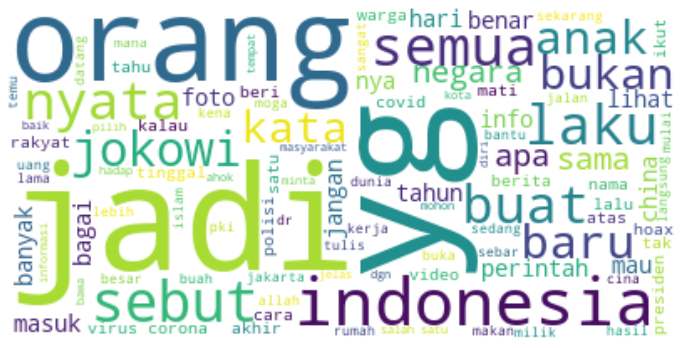

In [ ]:
wordcloud_narasi = WordCloud(stopwords=stopword, max_words=100, background_color="white").generate(narasi_latih_text)

plt.figure(figsize=(12,9))
plt.imshow(wordcloud_narasi, interpolation='bilinear')
plt.axis("off")
plt.show()

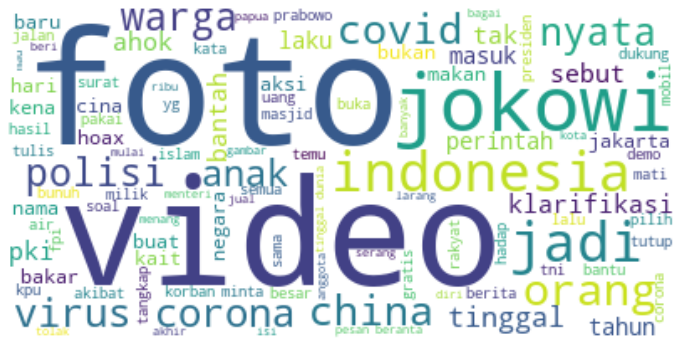

In [ ]:
wordcloud_judul = WordCloud(stopwords=stopword, max_words=100, background_color="white").generate(judul_latih_text)

plt.figure(figsize=(12,9))
plt.imshow(wordcloud_judul, interpolation='bilinear')
plt.axis("off")
plt.show()

#Modelling
Pada bagian ini, akan dibentuk model dengan pendekatan **Multimodal Deep Learning**, dengan menggunakan data citra (Gambar yang digunakan) dan teks (Judul dan Narasi) sebagai input.

##Baseline

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LSTM, Embedding, Bidirectional, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from mlxtend.classifier import EnsembleVoteClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall
from tensorflow_addons.metrics import F1Score

In [ ]:
!pip install mlxtend

In [ ]:
gambar_shape = (300,300,4)
jumlah_token_judul = 14152
jumlah_token_narasi = 7240

In [ ]:
label=label.reshape(4230,1)

In [ ]:
prec = Precision(name='prec')
rec = Recall(name='rec')
f1_score = F1Score(num_classes=2, name='f1_score')

In [ ]:
def baseline_model():
  #Input untuk Gambar
  in_gambar = Input(shape=gambar_shape)
  gambar = Rescaling(1./255)(in_gambar)
  gambar = Conv2D(32, (3, 3), activation='relu', input_shape=gambar_shape)(gambar)
  gambar = MaxPooling2D(2, 2)(gambar)
  gambar = Conv2D(64, (3, 3), activation='relu')(gambar)
  gambar = MaxPooling2D(2, 2)(gambar)
  gambar = Conv2D(128, (3, 3), activation='relu')(gambar)
  gambar = MaxPooling2D(2, 2)(gambar)
  gambar = Conv2D(128, (3, 3), activation='relu')(gambar)
  gambar = MaxPooling2D(2, 2)(gambar)
  gambar = Flatten()(gambar)
  gambar = Dropout(0.1)(gambar)
  out_gambar = Dense(256, activation='relu')(gambar)

  #Input untuk Teks Judul
  in_judul = Input(shape=max_length_judul)
  judul = Embedding(jumlah_token_judul, embedding_dim, input_length=max_length_judul)(in_judul)
  judul = Dropout(0.1)(judul)
  judul = Bidirectional(LSTM(32, return_sequences=True))(judul)
  judul = Dropout(0.1)(judul)
  judul = Bidirectional(LSTM(32))(judul)
  judul = Dropout(0.1)(judul)
  out_judul = Dense(16, activation='relu')(judul)

  #Input untuk Teks Narasi
  in_narasi = Input(shape=max_length_narasi)
  narasi = Embedding(jumlah_token_narasi, embedding_dim, input_length=max_length_narasi)(in_narasi)
  narasi = Dropout(0.1)(narasi)
  narasi = Bidirectional(LSTM(64, return_sequences=True))(narasi)
  narasi = Dropout(0.1)(narasi)
  narasi = Bidirectional(LSTM(64))(narasi)
  narasi = Dropout(0.1)(narasi)
  out_narasi = Dense(32, activation='relu')(narasi)

  #Gabungkan semua output
  concat = concatenate([out_gambar, out_judul, out_narasi])
  full = Dense(256, activation='relu')(concat)
  full = Dropout(0.1)(full)
  full = Dense(128, activation='relu')(full)
  output = Dense(label.shape[1], activation='sigmoid')(full)

  model = Model(inputs=[in_gambar, in_judul, in_narasi], outputs=[output])
  adam = Adam(lr=0.001, decay=1e-5)

  model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['acc',prec,rec,f1_score])
  return model

In [ ]:
baseline = baseline_model()
baseline.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           [(None, 300, 300, 4) 0                                            
__________________________________________________________________________________________________
rescaling_5 (Rescaling)         (None, 300, 300, 4)  0           input_14[0][0]                   
__________________________________________________________________________________________________
conv2d_17 (Conv2D)              (None, 298, 298, 32) 1184        rescaling_5[0][0]                
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 149, 149, 32) 0           conv2d_17[0][0]                  
_______________________________________________________________________________________

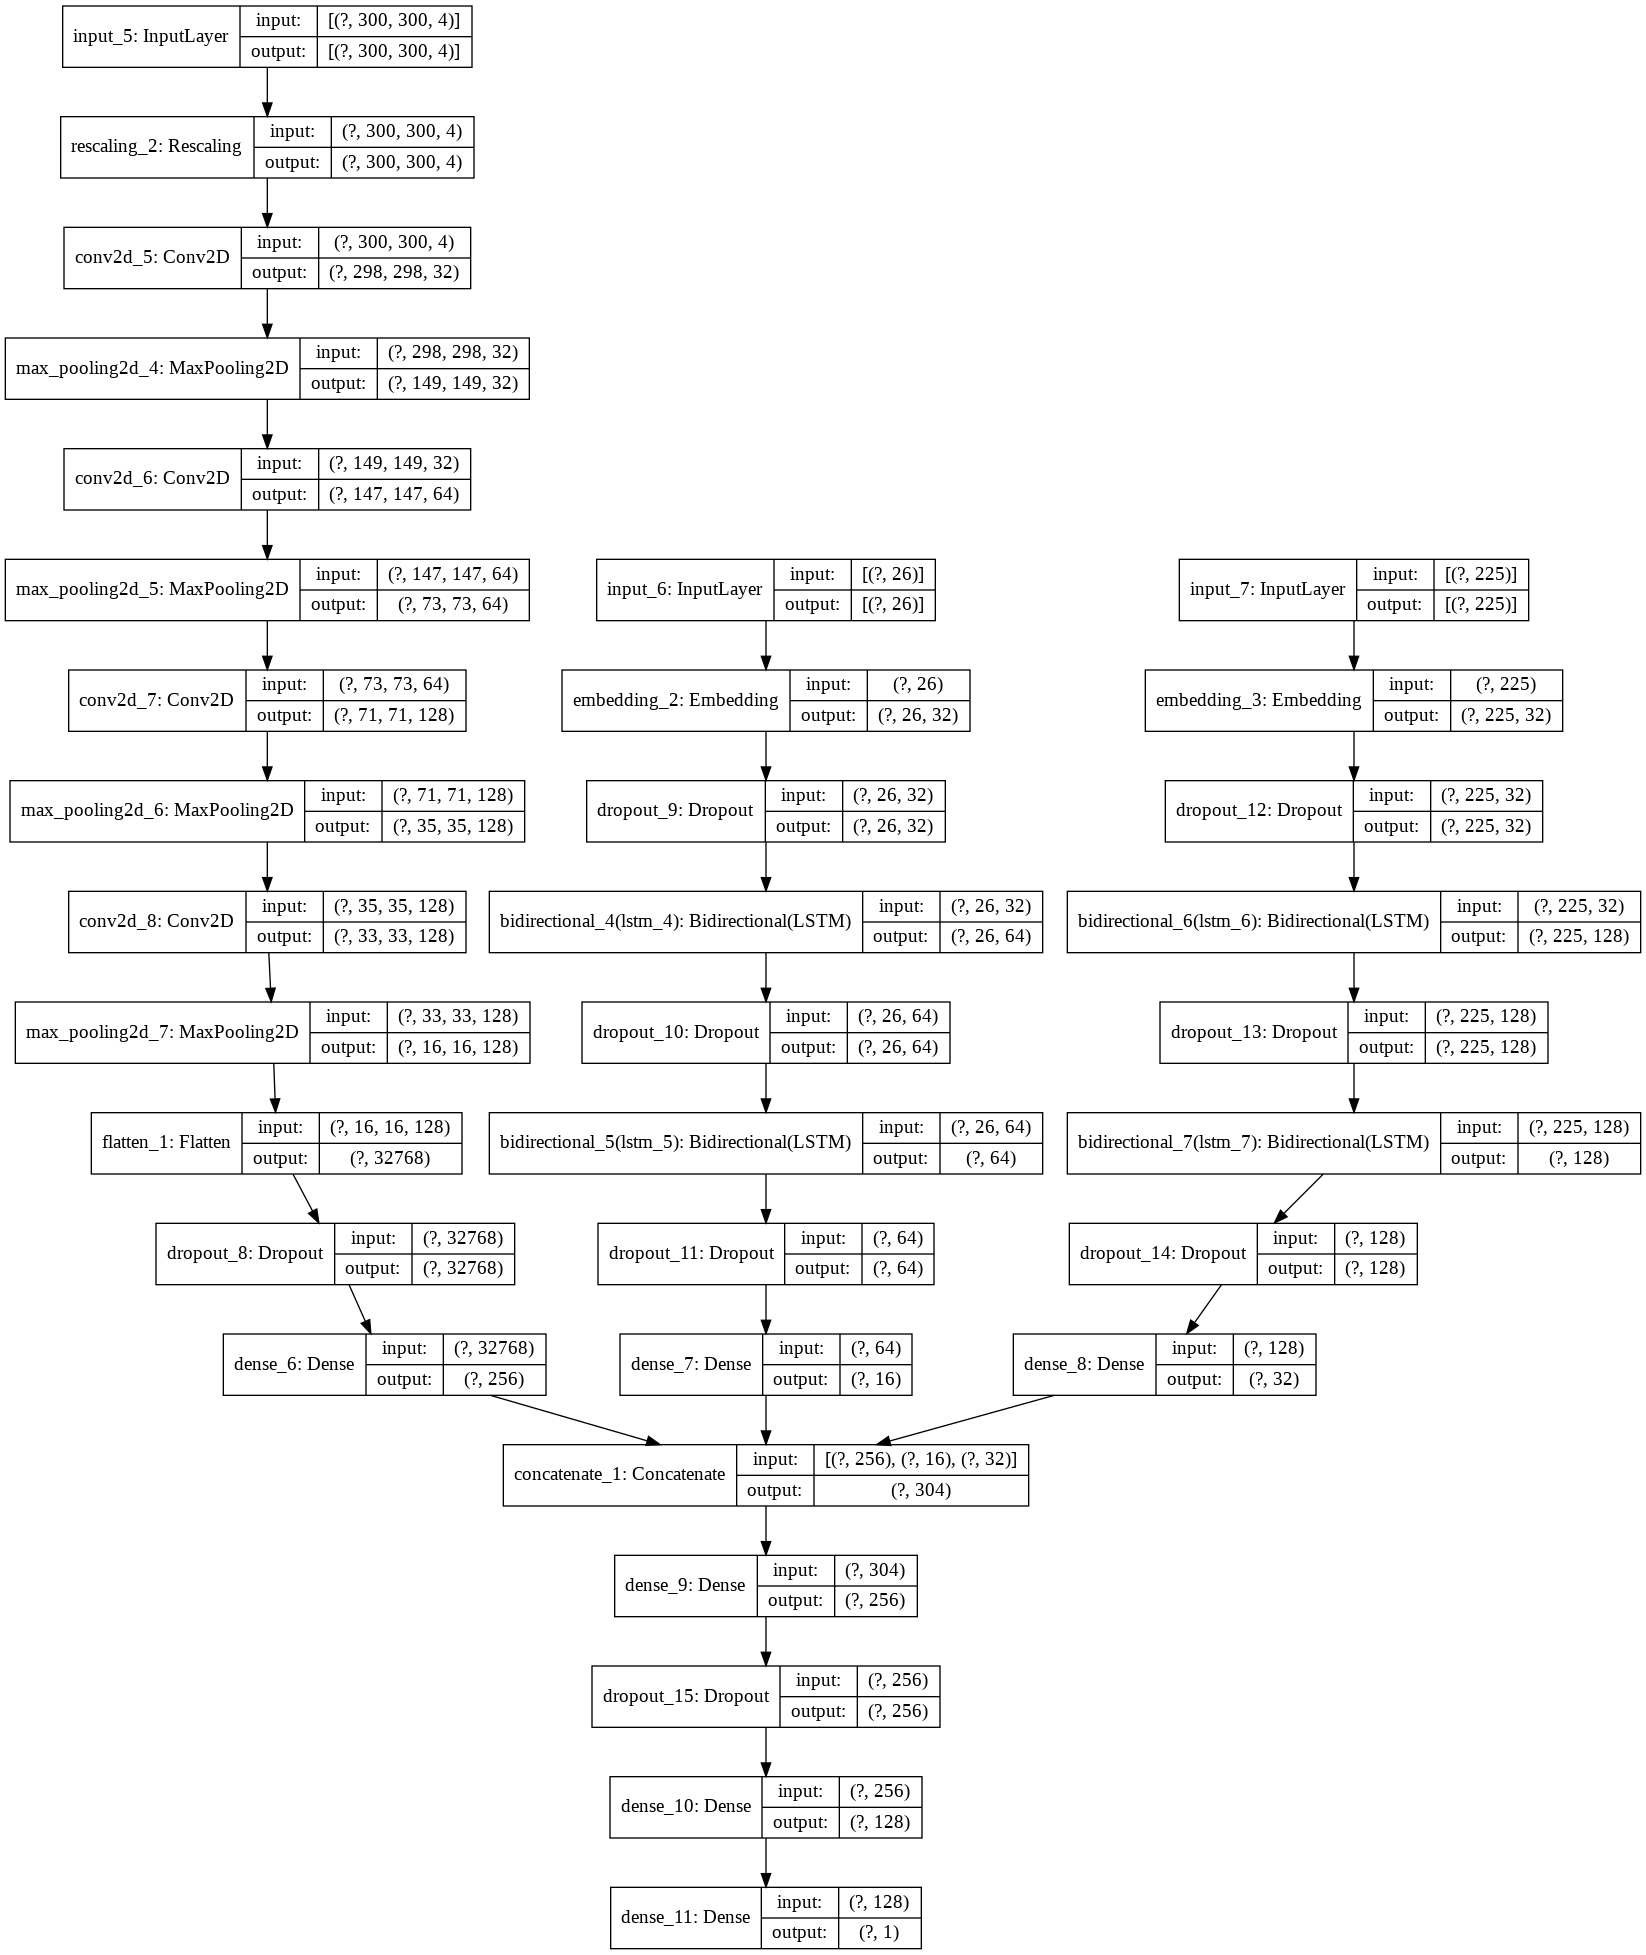

In [ ]:
plot_model(baseline, to_file='/content/drive/My Drive/SATRIA DATA 2020/BDC/Data BDC/Data Latih/model baseline.png', show_shapes=True)

In [ ]:
es = EarlyStopping(monitor='f1_score', patience=5)

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(
    (
        {"in_gambar":gambar_latih, "in_judul":judul_latih_pad, "in_narasi":narasi_latih_pad},
        {"output":label},
    )
)
hist = baseline.fit(train_data, epochs=30, callbacks=[es])

ValueError: ignored

##Transfer Learning